<a href="https://colab.research.google.com/github/ArwaAsiri/Affaq/blob/main/AfaaqTask4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# importing packages


import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import learning_curve


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# reading data file
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [31]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {num_duplicates}")

Number of duplicate rows found: 0


#Pipeline and ColumnTransformer:

using this approach automates the preprocessing of data, as it handles the missing values, normalizes numerical features, encodes categorical features, all in one step using a pipline object and passing it to the transformer.

In [5]:
# Define features (X) and target (y) first
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

#Storing the features in a list to handle later using the variables
numeric_features= X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features= X.select_dtypes(include=['object']).columns.tolist()

#handling numerical values
numeric_pipline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#handling categorical values

categorical_pipline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#applying the columntransformer:

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipline, numeric_features),
    ('cat', categorical_pipline, categorical_features)
])

Pipeline(steps=[('preprocessor', preprocessor),
                ('classifier', LogisticRegression()) ])

print(numeric_features)
print(categorical_features)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Spitting the data for testing and training:

In [6]:
# Define target variable (y) and features (X)
y = df['Churn']
X = df.drop(['Churn', 'customerID'], axis=1)

# splitting the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 19)
Shape of X_test: (1409, 19)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


#Hyperparameter Tuning

Applying the GridSearchCV on logistic regeression:

In [7]:
param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=1000)],
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['lbfgs', 'saga']
    },
]

In [8]:
grid_search = GridSearchCV(
    Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())]),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(h...
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000)],
                          'classifier__C': [0.1, 1, 10],
                          'classifier__solver': ['lbfgs', 'saga']}],
             scoring='f1')

In [9]:
# Retrieve the best model pipeline
best_model_pipeline = grid_search.best_estimator_

print("Best model pipeline:")
display(best_model_pipeline)

Best model pipeline:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(C=0.1, max_iter=1000))])

In [10]:
# Define a pipeline with default Logistic Regression hyperparameters
default_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression()) # Using default hyperparameters
])

# Train the default model pipeline
default_model_pipeline.fit(X_train, y_train)

print("Default model pipeline trained.")

Default model pipeline trained.


Comparing between the tuned model and default model,

It appears that the tuned model outperformed the default one in the precision, but all the other metrices performed better in the default model.

In [11]:

# Make predictions on the test set with the best tuned model
y_pred_tuned = best_model_pipeline.predict(X_test)

# Make predictions on the test set with the default model
y_pred_default = default_model_pipeline.predict(X_test)

# Evaluate the best tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, pos_label='Yes')
recall_tuned = recall_score(y_test, y_pred_tuned, pos_label='Yes')
f1_tuned = f1_score(y_test, y_pred_tuned, pos_label='Yes')

print("Best Tuned Model Performance on Test Set:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1 Score: {f1_tuned:.4f}")

print("\n" + "="*30 + "\n")

# Evaluate the default model
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default, pos_label='Yes')
recall_default = recall_score(y_test, y_pred_default, pos_label='Yes')
f1_default = f1_score(y_test, y_pred_default, pos_label='Yes')

print("Default Model Performance on Test Set:")
print(f"Accuracy: {accuracy_default:.4f}")
print(f"Precision: {precision_default:.4f}")
print(f"Recall: {recall_default:.4f}")
print(f"F1 Score: {f1_default:.4f}")

Best Tuned Model Performance on Test Set:
Accuracy: 0.8211
Precision: 0.6897
Recall: 0.5898
F1 Score: 0.6358


Default Model Performance on Test Set:
Accuracy: 0.8211
Precision: 0.6850
Recall: 0.6005
F1 Score: 0.6400


# Class Imbalance
Analyze class imbalance in the dataset, apply class weighting and SMOTE techniques to adress imbalance in data

In [12]:
# Check the distribution of the target variable 'Churn'
print(y.value_counts())

# Print the percentage
print(y.value_counts(normalize=True) * 100)

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No    73.46
Yes   26.54
Name: proportion, dtype: float64


##  class weighting
 using the "class_weight='balanced'" parameter to handle imbalance.


In [13]:
# Create a new pipeline with class_weight='balanced'
weighted_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000)) # Added max_iter to avoid convergence warning
])

# Train the weighted model pipeline
weighted_model_pipeline.fit(X_train, y_train)

print("Weighted model pipeline trained.")

Weighted model pipeline trained.


## Apply smote
Use the SMOTE technique to handle imbalance classes:


In [16]:
#pipline integrated with SMOTE :

smote_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE
    ('classifier', LogisticRegression(max_iter=1000)) # logistic regression
])

# Train the smote model
smote_model_pipeline.fit(X_train, y_train)

print("SMOTE model pipeline trained.")

SMOTE model pipeline trained.


## Evaluate models with imbalance handling

Evaluate the performance of the models trained with class weighting and SMOTE on the test set using relevant metrics (accuracy, precision, recall, F1-score).


In [17]:


# Make predictions on the test set with the weighted model
y_pred_weighted = weighted_model_pipeline.predict(X_test)

# Make predictions on the test set with the SMOTE model
y_pred_smote = smote_model_pipeline.predict(X_test)

# Evaluate the weighted model
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted, pos_label='Yes')
recall_weighted = recall_score(y_test, y_pred_weighted, pos_label='Yes')
f1_weighted = f1_score(y_test, y_pred_weighted, pos_label='Yes')

print("Weighted Model Performance on Test Set:")
print(f"Accuracy: {accuracy_weighted:.4f}")
print(f"Precision: {precision_weighted:.4f}")
print(f"Recall: {recall_weighted:.4f}")
print(f"F1 Score: {f1_weighted:.4f}")

print("\n" + "="*30 + "\n")

# Evaluate the SMOTE model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote, pos_label='Yes')
recall_smote = recall_score(y_test, y_pred_smote, pos_label='Yes')
f1_smote = f1_score(y_test, y_pred_smote, pos_label='Yes')

print("SMOTE Model Performance on Test Set:")
print(f"Accuracy: {accuracy_smote:.4f}")
print(f"Precision: {precision_smote:.4f}")
print(f"Recall: {recall_smote:.4f}")
print(f"F1 Score: {f1_smote:.4f}")

Weighted Model Performance on Test Set:
Accuracy: 0.7495
Precision: 0.5168
Recall: 0.8257
F1 Score: 0.6357


SMOTE Model Performance on Test Set:
Accuracy: 0.7594
Precision: 0.5289
Recall: 0.8338
F1 Score: 0.6472


##Comparing the models and Results:
both class weighting and SMOTE successfully improved the **recall metric** compared to the default and tuned models. Recall is crucial in this context as it measures the model's ability to identify positive cases (churn)

Looking at the **F1-score**, which is the harmonic mean of precision and recall, both imbalance handling techniques also showed improvement compared to the default and tuned models

Between the two imbalance handling techniques, the **SMOTE model generally performed slightly better across all metrics**

In this specific case, SMOTE appears to have been slightly more effective in improving the model's ability to correctly identify churn while maintaining a reasonable balance with precision.

#Plot Learning Curves

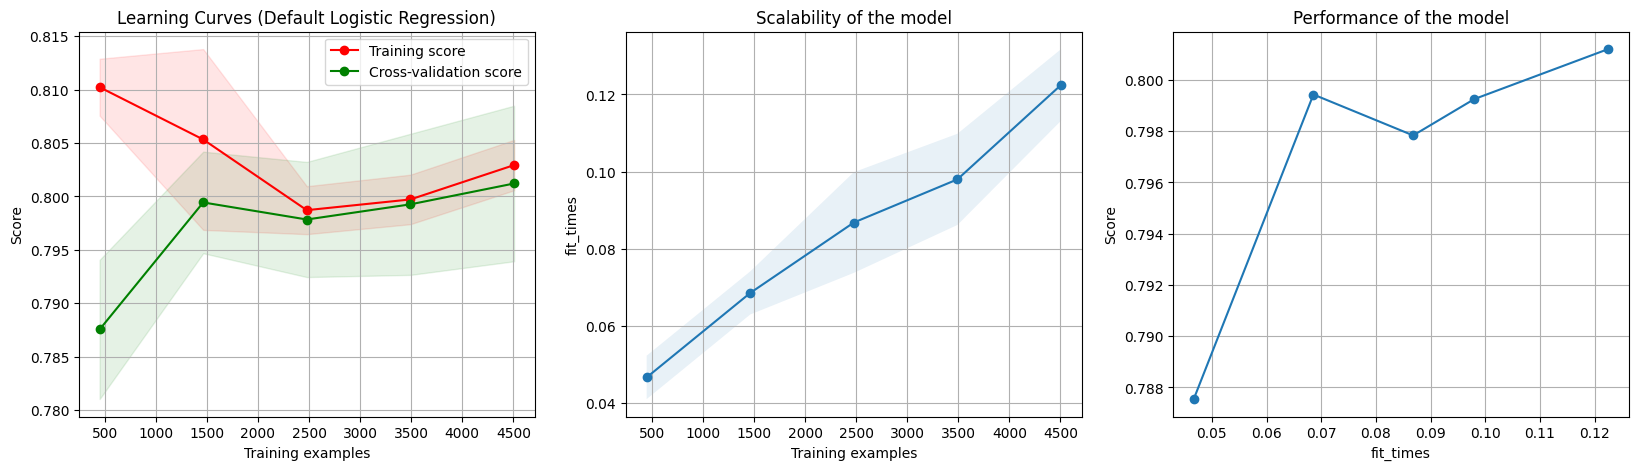

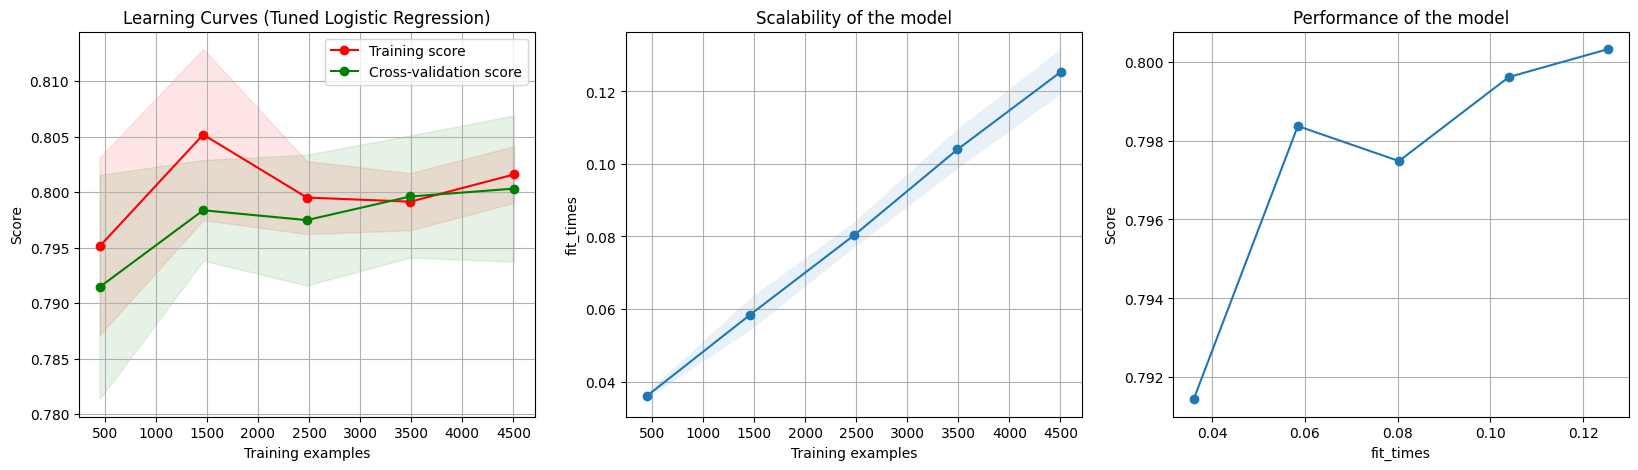

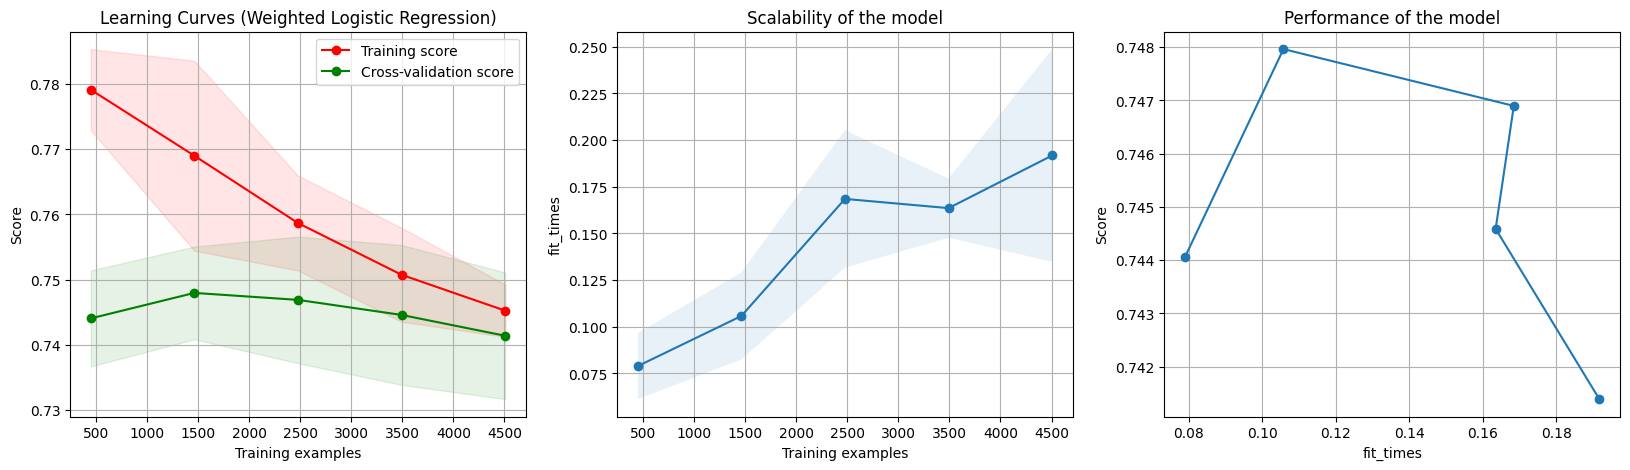

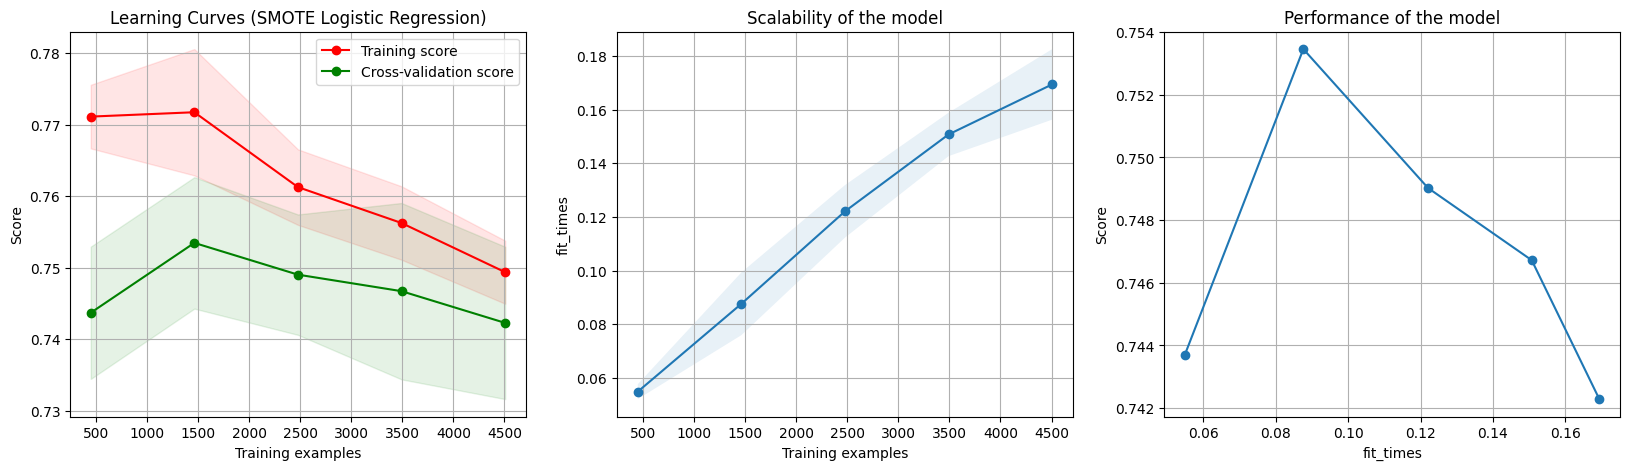

In [21]:


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# Plotting learning curves for the default Logistic Regression model
title = "Learning Curves (Default Logistic Regression)"
plot_learning_curve(default_model_pipeline, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

# Plotting learning curves for the best tuned Logistic Regression model
title = "Learning Curves (Tuned Logistic Regression)"
plot_learning_curve(best_model_pipeline, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

# Plotting learning curves for the weighted Logistic Regression model
title = "Learning Curves (Weighted Logistic Regression)"
plot_learning_curve(weighted_model_pipeline, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

# Plotting learning curves for the SMOTE Logistic Regression model
title = "Learning Curves (SMOTE Logistic Regression)"
plot_learning_curve(smote_model_pipeline, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()


Interpretation of Learning Curves:

By examining the learning curves, we can gain insights into a model’s performance:

When the training score and cross-validation score converge to similar values and both are relatively low, it indicates high bias or underfitting. This means the model is too simple to capture the underlying patterns in the data.

If the training score is much higher than the cross-validation score and the gap between them remains large as more training data is added, this suggests high variance or overfitting. In this case, the model is too complex and is fitting the training data—including the noise—too closely.

If both scores are high and converge, the model is likely a good fit.

You can look at the plots for each model to assess whether they are underfitting or overfitting, based on how the training and cross-validation curves behave and whether there's a persistent gap between them.

In this case, for Logistic Regression:

Default Model:
The training score stays consistently higher than the cross-validation score. Although the gap narrows slightly as more data is added, it doesn’t close entirely. This suggests some level of overfitting.

Tuned Model:
Like the default model, there's still a gap between the training and cross-validation scores, indicating overfitting. However, the tuned parameters may have adjusted the extent of it.

Weighted Model:
The learning curves also show a noticeable gap, pointing to overfitting. While applying class weights changes how errors are penalized, it doesn’t necessarily prevent the model from overfitting.

SMOTE Model:
Similarly, the SMOTE model reveals a gap between the training and cross-validation scores. SMOTE addresses class imbalance by generating synthetic samples, but it can sometimes lead to overfitting—especially if the new samples are too similar to existing ones or introduce noise.

Conclusion:
All four models show some degree of overfitting. While Logistic Regression may have enough capacity for the task, the observed overfitting highlights the importance of techniques like regularization (as applied in the best-tuned model). Further improvements might involve trying alternative models or using more advanced forms of regularization.

#Feature Selection:

Trying to find the optimal number of K to apply the feature selection onto

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer

# Define the pipeline including preprocessing, feature selection, and the classifier
pipeline_kbest_tuning = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif)),
    ('classifier', LogisticRegression(max_iter=1000))
])


# total number of features after preprocessing
X_train_processed_sample = preprocessor.fit_transform(X_train.head())
num_features_after_preprocessing = X_train_processed_sample.shape[1]

param_grid_kbest = {
    'selector__k': list(range(1, num_features_after_preprocessing + 1))
}

# Define the scoring metric (using f1_score to address imbalance)
scorer = make_scorer(f1_score, pos_label='Yes')

# Set up GridSearchCV
grid_search_kbest = GridSearchCV(
    pipeline_kbest_tuning,
    param_grid_kbest,
    cv=5, # Using 5-fold cross-validation
    scoring=scorer,
    n_jobs=-1 # Use all available CPU cores
)

print("Starting GridSearchCV for SelectKBest k parameter...")

# Fit GridSearchCV on the training data
grid_search_kbest.fit(X_train, y_train)

print("GridSearchCV finished.")

# Print the best parameter (best k) and the corresponding best score
print("\nBest parameter (k):", grid_search_kbest.best_params_)
print("Best cross-validation F1 score:", grid_search_kbest.best_score_)

#  best estimator (the pipeline with the best k):
best_pipeline_kbest = grid_search_kbest.best_estimator_

#  best pipeline on the test set
y_pred_best_kbest = best_pipeline_kbest.predict(X_test)
f1_best_kbest = f1_score(y_test, y_pred_best_kbest, pos_label='Yes')

print("\nTest Set Performance with Best SelectKBest k:")
print(f"F1 Score: {f1_best_kbest:.4f}")

Starting GridSearchCV for SelectKBest k parameter...
GridSearchCV finished.

Best parameter (k): {'selector__k': 28}
Best cross-validation F1 score: 0.5879049356706457

Test Set Performance with Best SelectKBest k:
F1 Score: 0.6348


In [28]:


# Apply the preprocessor to transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
categorical_feature_names = list(ohe.get_feature_names_out(categorical_features))
all_feature_names = numeric_features + categorical_feature_names
print(f"\nTotal number of features after preprocessing: {len(all_feature_names)}")


# Select the top K features
k = 28
selector = SelectKBest(score_func=f_classif, k=k) # for classification

# Fit the selector on the processed training data
selector.fit(X_train_processed, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names_kbest = [all_feature_names[i] for i in selected_feature_indices]

print(f"\nSelected top {k} features using SelectKBest:")
print(selected_feature_names_kbest)



# pipeline that includes feature selection after preprocessing
pipeline_kbest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k=k)),
    ('classifier', LogisticRegression(max_iter=1000)) # Using Logistic Regression for comparison
])

# Train the model with selected features
print(f"\nTraining Logistic Regression model with {k} selected features...")
pipeline_kbest.fit(X_train, y_train)

# Evaluate the model with selected features
y_pred_kbest = pipeline_kbest.predict(X_test)

accuracy_kbest = accuracy_score(y_test, y_pred_kbest)
precision_kbest = precision_score(y_test, y_pred_kbest, pos_label='Yes')
recall_kbest = recall_score(y_test, y_pred_kbest, pos_label='Yes')
f1_kbest = f1_score(y_test, y_pred_kbest, pos_label='Yes')

print("\nLogistic Regression Performance with SelectKBest Feature Selection:")
print(f"Accuracy: {accuracy_kbest:.4f}")
print(f"Precision: {precision_kbest:.4f}")
print(f"Recall: {recall_kbest:.4f}")
print(f"F1 Score: {f1_kbest:.4f}")

#  Method 2: Model-based Importance (using RandomForestClassifier) ---
print("\n--- Feature Selection using Model-based Importance (RandomForestClassifier) ---")

# Train a RandomForestClassifier to get feature importances
# Use a pipeline that preprocesses data before the model
pipeline_rf_importance = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

print("\nTraining RandomForestClassifier to get feature importances...")
pipeline_rf_importance.fit(X_train, y_train)

# Get the feature importances from the trained model
rf_classifier = pipeline_rf_importance.named_steps['classifier']
feature_importances = rf_classifier.feature_importances_

# view feature names and their importances
importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

print("\nFeature Importances from RandomForestClassifier:")
print(importance_df.head(20)) # Display top 20 features


importance_threshold = 0.01 # importance threshold
selected_features_model_based = importance_df[importance_df['importance'] > importance_threshold]['feature'].tolist()


k_model = 28
selected_features_model_based_topk = importance_df.head(k_model)['feature'].tolist()
print(f"\nSelected top {k_model} features based on Model Importance:")
print(selected_features_model_based_topk)


#  train the Logistic Regression model using only these selected features

# Identify which of the selected features are numeric and which are categorical
selected_numeric_features = [f for f in selected_features_model_based_topk if f in numeric_features]
selected_categorical_features = [f for f in selected_features_model_based_topk if f in categorical_features]

# Create a new preprocessor with only the selected features
preprocessor_selected = ColumnTransformer(transformers=[
    ('num', numeric_pipline, selected_numeric_features),
    ('cat', categorical_pipline, selected_categorical_features)
])

# Define a new pipeline with the selected features preprocessor
pipeline_model_based = Pipeline(steps=[
    ('preprocessor', preprocessor_selected),
    ('classifier', LogisticRegression(max_iter=1000)) # Using Logistic Regression for comparison
])

# Train the model with selected features
print(f"\nTraining Logistic Regression model with {k_model} model-based selected features...")

pipeline_model_based.fit(X_train[selected_numeric_features + selected_categorical_features], y_train) # Fit on original data, preprocessor handles the subset

# Evaluate the model with selected features
y_pred_model_based = pipeline_model_based.predict(X_test[selected_numeric_features + selected_categorical_features])

accuracy_model_based = accuracy_score(y_test, y_pred_model_based)
precision_model_based = precision_score(y_test, y_pred_model_based, pos_label='Yes')
recall_model_based = recall_score(y_test, y_pred_model_based, pos_label='Yes')
f1_model_based = f1_score(y_test, y_pred_model_based, pos_label='Yes')

print("\nLogistic Regression Performance with Model-Based Feature Selection:")
print(f"Accuracy: {accuracy_model_based:.4f}")
print(f"Precision: {precision_model_based:.4f}")
print(f"Recall: {recall_model_based:.4f}")
print(f"F1 Score: {f1_model_based:.4f}")


#  Comparison n
print("\n Comparison of Performance Before and After Feature Selection ")

print("\nPerformance Before Feature Selection (Default Logistic Regression):")
print(f"Accuracy: {accuracy_default:.4f}")
print(f"Precision: {precision_default:.4f}")
print(f"Recall: {recall_default:.4f}")
print(f"F1 Score: {f1_default:.4f}")

print("\nPerformance with SelectKBest Feature Selection (Logistic Regression):")
print(f"Accuracy: {accuracy_kbest:.4f}")
print(f"Precision: {precision_kbest:.4f}")
print(f"Recall: {recall_kbest:.4f}")
print(f"F1 Score: {f1_kbest:.4f}")

print("\nPerformance with Model-Based Feature Selection (Logistic Regression):")
print(f"Accuracy: {accuracy_model_based:.4f}")
print(f"Precision: {precision_model_based:.4f}")
print(f"Recall: {recall_model_based:.4f}")
print(f"F1 Score: {f1_model_based:.4f}")



Total number of features after preprocessing: 45

Selected top 28 features using SelectKBest:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']

Training Logistic Regression model with 28 selected features...

Logistic Regression Performance with SelectKBest Feature Selection:
Accuracy: 0.8211
Precision: 0.6909
Recall: 0.5871
F1 Score: 0.6348

--- Feature Selection using M

## Performance Comparison and Trade-offs: Before vs. After SelectKBest Feature Selection



**Key Insights:**

*   **Performance:** The performance metrics (Accuracy, Precision, Recall, F1 Score) are very similar between the default Logistic Regression model and the model using the top 28 features selected by `SelectKBest`. For this dataset and model, feature selection did not significantly improve or degrade predictive performance.
*   **Trade-offs:** Despite similar performance, feature selection offers benefits:
    *   **Complexity & Interpretability:** Using fewer features makes the model simpler and easier to understand.
    *   **Training Time:** Can potentially reduce training time, especially for more complex models or larger datasets.
*   **Conclusion:** While feature selection didn't boost performance here, the reduced complexity and improved interpretability can still be valuable trade-offs. The effectiveness of feature selection is dataset and model dependent.

-------------------------------------------------------------------------

#Reflection Questions & Deliverables

###1. What is the difference between these plots: countplot, barplot, histplot, boxplot, and scatterplot, and when to use each type (categorical vs. numerical)?

Countplots and barplots are used for categorical data: countplots show the number of occurrences in each category, while barplots display summary statistics (like the mean) of a numerical variable for each category. Histplots are used for visualizing the distribution of a single numerical variable, showing how values are spread. Boxplots also show distribution but include medians, quartiles, and outliers, useful for comparing numerical data across categories. Scatterplots, on the other hand, are for numerical vs. numerical data, helping to reveal relationships or correlations between two continuous variables.


###2. What Step Had the Biggest Impact on Model Performance?
Balancing the classes had the biggest impact as it noticable increased the f1-score results.


###3. How Did Hyperparameter Tuning Affect Your Results?
The tuned model underperformed compared to the default one via GridSearchCV, as the f1-score and recall decreased slighty after tuning.

###4. What trade-offs did you encounter using pipelines?
Pros: Cleaner code, reproducibility, no data leakage.

Cons: Less flexibility for debugging intermediate steps; harder to manually inspect transformed features.

###5. How do we detect overfitting and underfitting?
Overfitting: High training accuracy, low test accuracy.

Underfitting: Low accuracy on both training and test sets.

We Used cross-validation scores and learning curves to diagnose.



###6. Which plots are most useful for analyzing data distribution?
Numerical: histplot, boxplot, distplot, KDE plot.

Categorical: countplot, pie chart.

### 7. When do we use LabelEncoder vs. OneHotEncoder, and why?
LabelEncoder: is used for ordinal categories that has ordered values.
OneHotEncoder: For nominal (non-ordered) categories, as it transforms the values into 0 an 1 only.

Using LabelEncoder for non-ordered values can be misleading, as the model will predict that the order matters and gives an actual importance to the order of data and how it affects the results.


### 8. What does random_state do, and when should we fix it?
It fixes randomness like in train-test split or model initialization, ensuring reproducibility. Always fix random_state when sharing results or comparing models.


###9. What would change if the data were all floats or all integers?

Floats often indicate continuous variables (needs scaling).

Integers could be either continuous or categorical, which may confuse the model if not encoded properly.

Additionally, using float values can lead to better accuracy, since the decimal part can have an impact on the model’s predictions.

###10. Which part of the pipeline was most impactful overall?
The most impactful part of the pipeline was handling class imbalance using SMOTE. Applying SMOTE significantly improved the model's recall and F1 score, especially on the minority class, which is critical for our task. It helped the model better identify positive churn cases that were previously underrepresented. Although hyperparameter tuning and feature selection also contributed, the improvement from SMOTE was the most noticeable in terms of overall performance and fairness.


###11. How can unbalanced data be dealt with, and which method did you apply in this project?

Imbalanced data can lead to a model that performs well overall but poorly on the minority class, as it tends to favor the majority class. To address this, common techniques include oversampling, undersampling, or adjusting class weights.

 In this project, I applied two methods: **class weighting** and **SMOTE** .like While both approaches helped, SMOTE gave better results, particularly improving recall and overall performance on the minority class.

###12.Did you check for duplicate records? How many did you find, and what did you do with them?

Yes I checked for duplicat records using "num_duplicates = df.duplicated().sum()" and found **none**.


###13. What is the difference between fit_transform() and transform()? Where did you apply each, and why?

fit_transform(): Learn + apply transformation (used in training).

transform(): Only apply learned transformation (used in test set or pipeline prediction).

Used fit_transform() in training pipeline steps and transform() on test data.



###14. What is the difference between model.predict() and model.predict_proba()? In which situations would you use each?
predict(): Gives final class label.

predict_proba(): Gives class probabilities like : 90% positive, 10% negative

Use predict_proba() when threshold tuning or ranking predictions by confidence.



###15. What was your final best model pipeline, and what made it the best?
Although the SMOTE model has lower accuracy, it achieves the highest recall (0.8338) and the highest F1 score (0.6472).

This makes it the best choice for an imbalanced classification task like churn prediction, where catching as many churners as possible is a key goal.

###16. How would you approach this task differently in a real-world production setting?

 In a real-world production setting, I would enhance the approach by focusing on model interpretability and explainability, using tools to better understand which features influence predictions, especially important for stakeholder trust in sensitive domains like churn prediction. I would also consider deploying the model as an API using tools like Flask or FastAPI to make it accessible for real-time predictions.